In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np

In [11]:
data=pd.read_csv("airline-safety.csv")
data.isna().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [12]:
data.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [13]:
print(data.shape)
data.head()

(56, 8)


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


Since all the variables that we are dealing with here are continous, we will look at continous methods of analysing data and try to draw conclusions baing on the visualizations and other statistical methods of analysing this information. Because we are data scientist we dont stop there we have to automate our solution into a product so that the result of the analysis can be used in the future on new dataset of the same kind.

Questions:
1. Has the safety of airlines inproved with time?

## Single dimension analysis

1. avail_seat_km_per_week

In [14]:
data["avail_seat_km_per_week"].describe()

count    5.600000e+01
mean     1.384621e+09
std      1.465317e+09
min      2.593733e+08
25%      4.740362e+08
50%      8.029089e+08
75%      1.847239e+09
max      7.139291e+09
Name: avail_seat_km_per_week, dtype: float64

In [15]:
#scalling the data for analysis
data["avail_seat_km_per_week"]=data["avail_seat_km_per_week"]/max(data["avail_seat_km_per_week"])

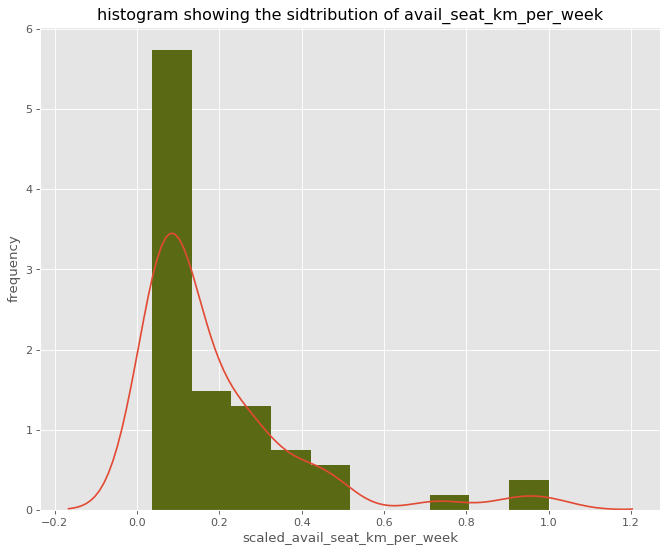

In [16]:
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(data["avail_seat_km_per_week"],color="g",bins=10,density=True)
sns.distplot(data["avail_seat_km_per_week"])
plt.title("histogram showing the sidtribution of avail_seat_km_per_week")
plt.xlabel("scaled_avail_seat_km_per_week")
plt.ylabel("frequency")
plt.show()

2. incidents

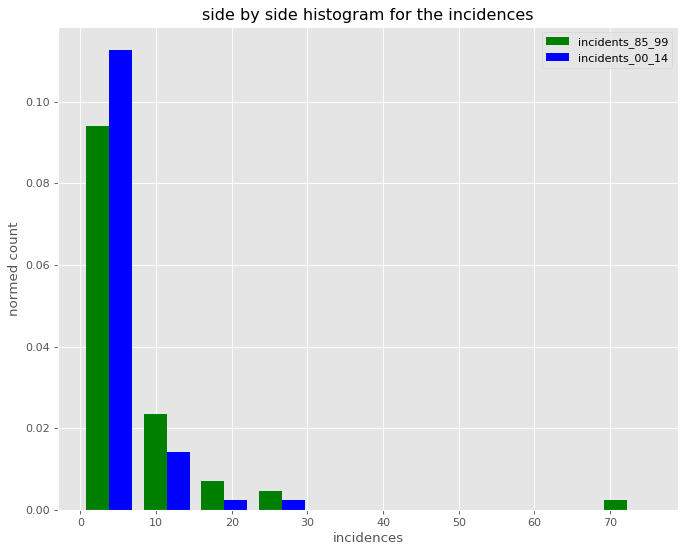

In [17]:
x1=list(data["incidents_85_99"])
x2=list(data["incidents_00_14"])
colors=["green","blue"]
names = ["incidents_85_99","incidents_00_14"]
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist([x1,x2],color = colors, label=names,density=True)
plt.legend()
plt.xlabel("incidences")
plt.ylabel("normed count")
plt.title("side by side histogram for the incidences")
plt.show()

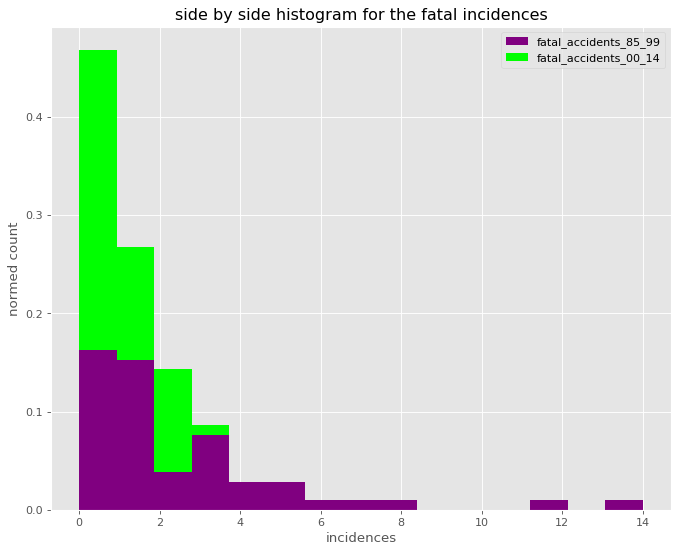

In [18]:
x1=list(data["fatal_accidents_85_99"])
x2=list(data["fatal_accidents_00_14"])
colors=["purple","lime"]
names = ["fatal_accidents_85_99","fatal_accidents_00_14"]
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist([x1,x2],color = colors, label=names,density=True,stacked=True,bins=15)
plt.legend()
plt.xlabel("incidences")
plt.ylabel("normed count")
plt.title("side by side histogram for the fatal incidences")
plt.show()

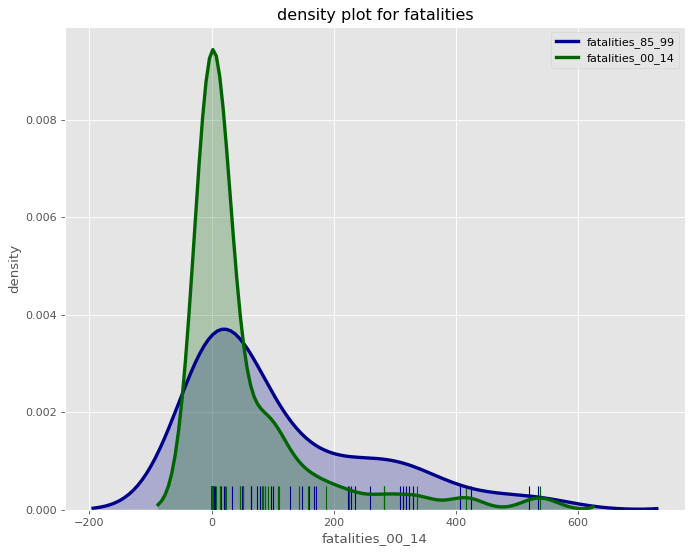

In [19]:
# Density plots and histogram for all fatalities 
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

sns.distplot(data["fatalities_85_99"],hist=False,kde=True,color='darkblue',hist_kws={'edgecolor':'black'},bins=7,
            kde_kws={'shade':True,'linewidth':3},label="fatalities_85_99",rug=True)
sns.distplot(data["fatalities_00_14"],hist=False,kde=True,color='darkgreen',hist_kws={'edgecolor':'black'},bins=7,
            kde_kws={'shade':True,'linewidth':3},label="fatalities_00_14",rug=True)
plt.legend()
plt.ylabel("density")
plt.title("density plot for fatalities")
plt.show()

# Double dimension analysis

correlation analysis

In [20]:
def heatmap(x,y,size):
    fig,ax=plt.subplots()
    # Mapping from column names to integer coordinates
    x_labels=[v for v in sorted(x.unique())]
    y_labels=[v for v in sorted(y.unique())]
    x_to_num={p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num={p[1]:p[0] for p in enumerate(y_labels)}
    
    size_scale = 250
    
    ax.scatter(
        x=x.map(x_to_num), #using mapping for x
        y=y.map(y_to_num),
        s=size*size_scale,
        c='darkblue',
        marker='s'
    )
    
    #showing column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels,rotation=45,horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(x_labels)
    
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_title("correlation plt for fatality metrics")
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

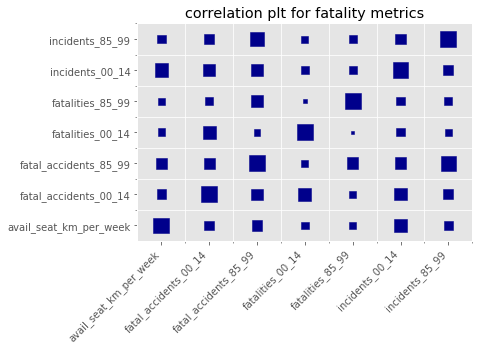

In [21]:
corr=data.corr()
corr=pd.melt(corr.reset_index(),id_vars='index')
columns=['x','y','value']#list(data.columns)[1:]
heatmap(
    x=corr['index'],
    y=corr['variable'],
    size=corr['value'].abs()
)
plt.show()

# hypothesis testing
I hypothsised that there is more safety currently than in the past. To check this hypothesis, I had to:
1. confirm that mean fatalities and incidences now is statistically less than mean fatalities and incidences in the past
2. confirm that median fatalities and incidences now is statistically less than media fatalities and incidences in the past
3. check the variability of the data

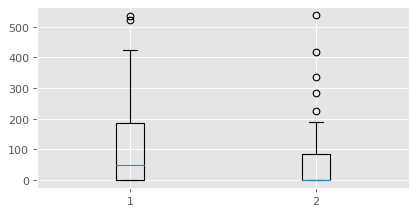

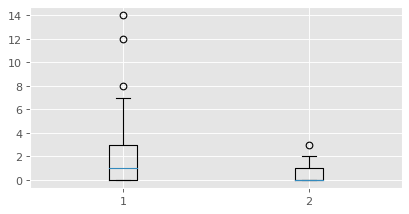

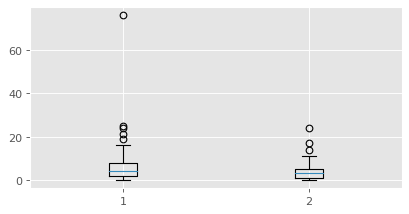

In [22]:
plt.figure(figsize=(6, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot([data["fatalities_85_99"],data["fatalities_00_14"]])
plt.show()

plt.figure(figsize=(6, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot([data["fatal_accidents_85_99"],data["fatal_accidents_00_14"]])
plt.show()

plt.figure(figsize=(6, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot([data["incidents_85_99"],data["incidents_00_14"]])
plt.show()

In [23]:
# testing for equality of variance
from scipy.stats import levene
levene(data["fatalities_85_99"],data["fatalities_00_14"])

LeveneResult(statistic=5.623630188491274, pvalue=0.019458555144367357)

# Safe airlines
To compare the safety of airline, I had to group them using unsupervised machine learning technique that clusters the airlines into different groups. These groups are:
1. Safe airlines.
2. Doubtfully safe airlines.
3. Risky airlines.

In [24]:
#0703360424 tata jerry
data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,0.044949,2,0,0,0,0,0
1,Aeroflot*,0.167758,76,14,128,6,1,88
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0
3,Aeromexico*,0.083604,3,1,64,5,0,0
4,Air Canada,0.261266,2,0,0,2,0,0


In [25]:
x_train=data.drop(["airline","avail_seat_km_per_week"],axis=1)

In [26]:
#Import the library
import SimpSOM as sps

In [27]:
#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(30, 30, x_train.values, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [28]:
#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 20000)

Training SOM... done!


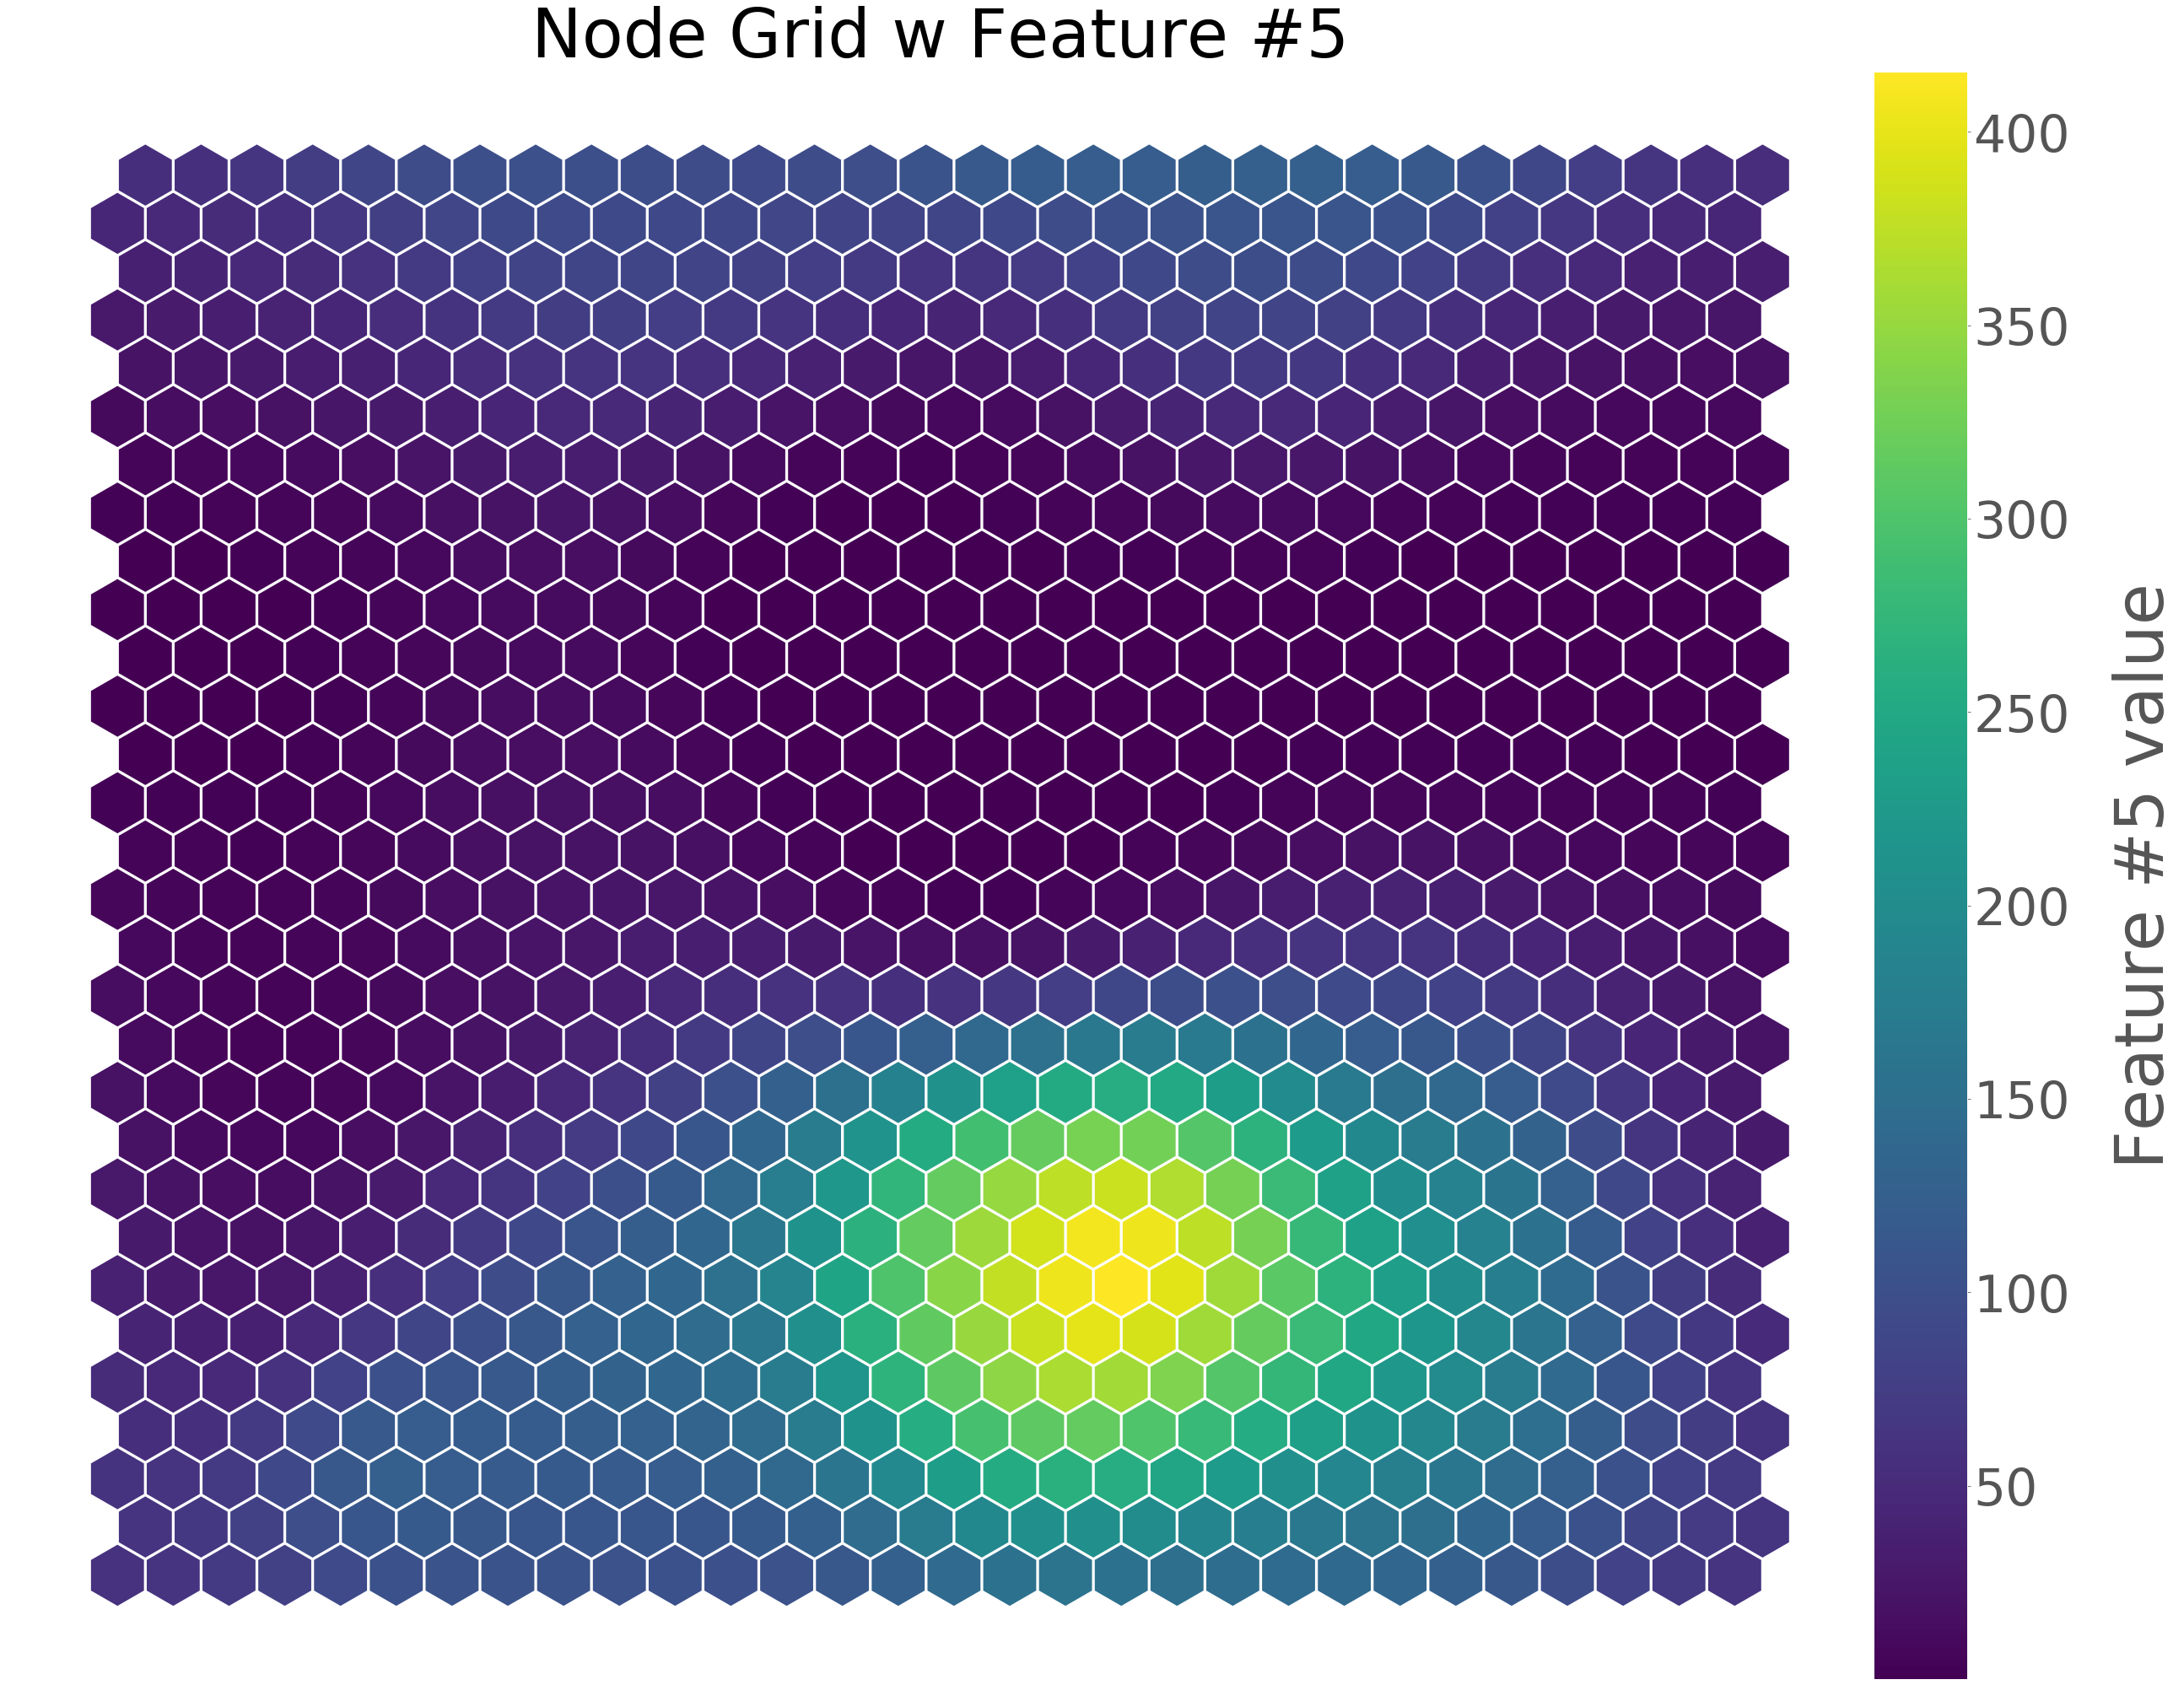

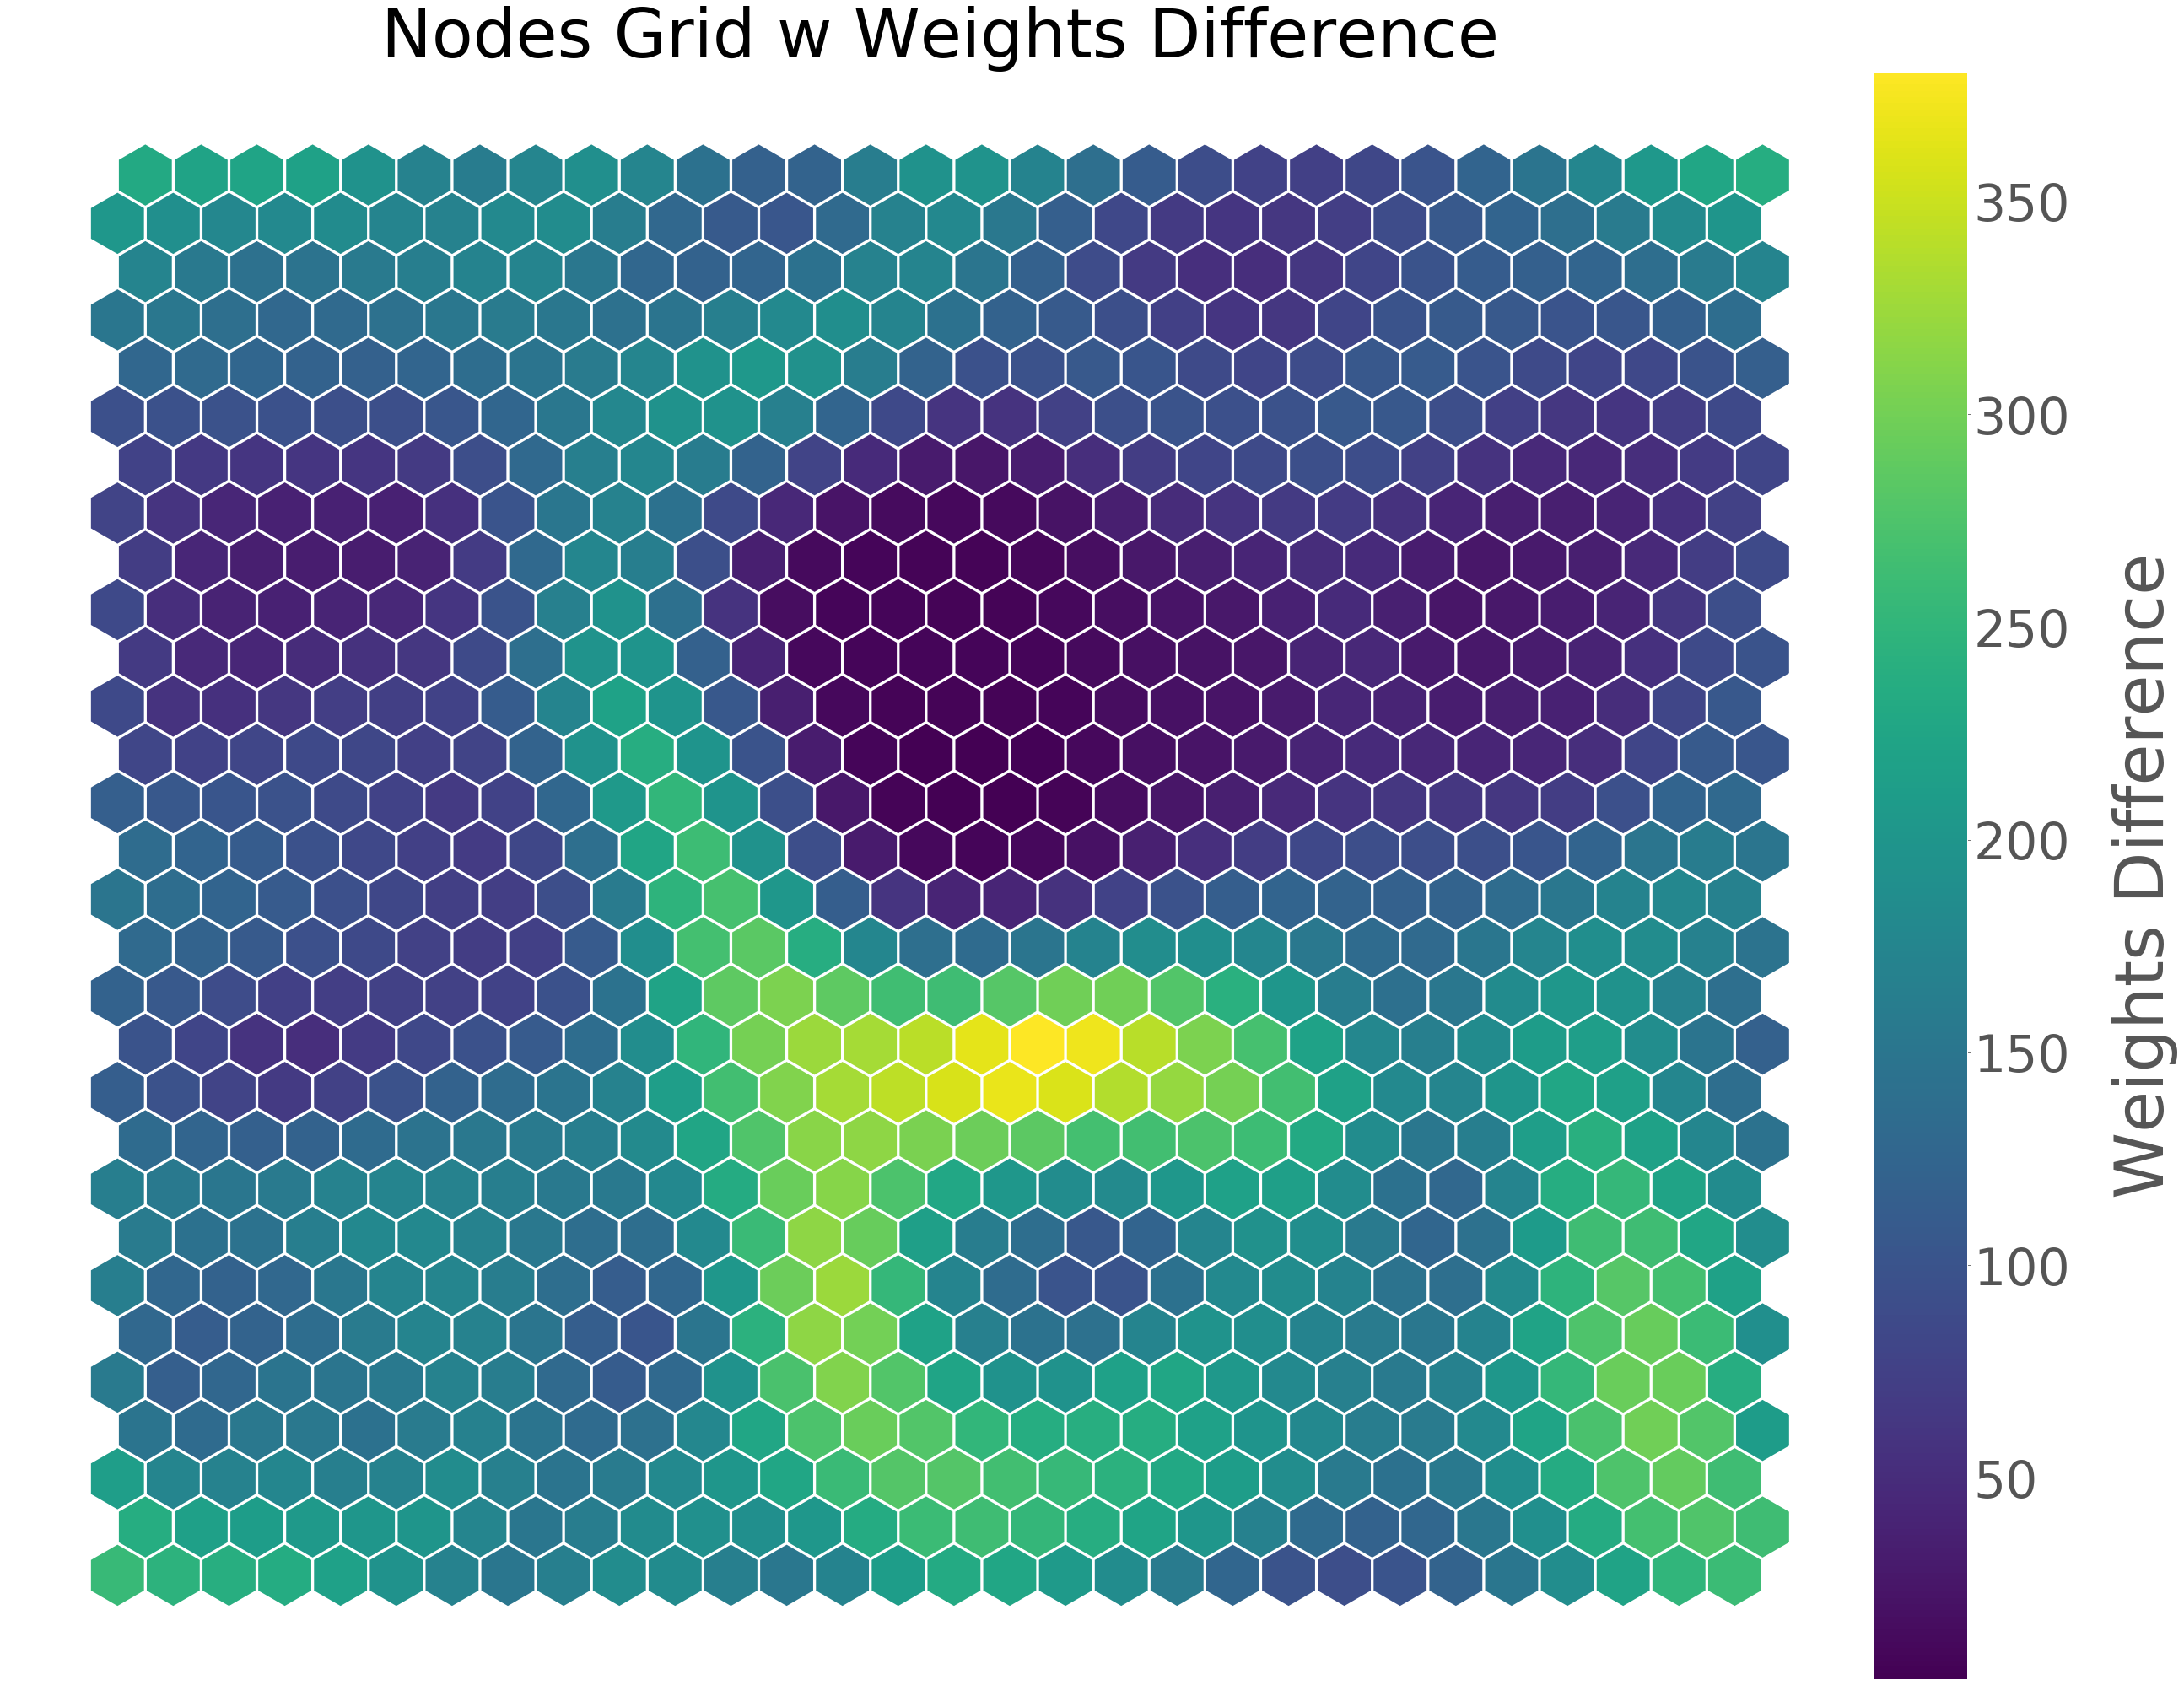

In [29]:
#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=5)
net.diff_graph()

In [30]:
#Project the datapoints on the new 2D network map.
prj=np.array(net.project(x_train.values))

<Figure size 432x288 with 0 Axes>

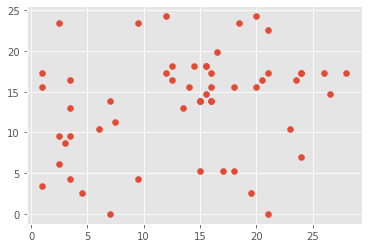

In [31]:
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [32]:
#Cluster the datapoints according to the Quality Threshold algorithm.
#net.cluster(x_train.values, type='qthresh')

In [33]:
x_train.values[0]

array([2, 0, 0, 0, 0, 0])

In [34]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
data["clusters"]=kmeans.labels_

In [38]:
data[data["clusters"]==1].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
6,Air India*,0.121756,2,1,329,4,1,158,1
13,Avianca,0.055597,5,3,323,0,0,0,1
16,China Airlines,0.113907,12,6,535,2,1,225,1
19,Delta / Northwest*,0.914049,24,12,407,24,2,51,1
20,Egyptair,0.078117,8,3,282,4,1,14,1


In [39]:
data[data["clusters"]==0].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,0.044949,2,0,0,0,0,0,0
1,Aeroflot*,0.167758,76,14,128,6,1,88,0
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0,0
3,Aeromexico*,0.083604,3,1,64,5,0,0,0
4,Air Canada,0.261266,2,0,0,2,0,0,0


In [40]:
data[data["clusters"]==2].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
5,Air France,0.420770,14,4,79,6,2,337,2
11,American*,0.732336,21,5,101,17,3,416,2
25,Gulf Air,0.042214,1,0,0,3,1,143,2
29,Kenya Airways,0.038857,2,0,0,2,2,283,2
34,Malaysia Airlines,0.145557,3,1,34,3,2,537,2
